In [1]:
cd ../sentiment-clf/

/Users/nguyen/projects/flask-rest-setup/sentiment-clf


In [2]:
from model import NLPModel
import pandas as pd
from sklearn.model_selection import train_test_split

## Create the model object
The NLP model object uses a Naive Bayes classifier and a TFIDF vectorizer:
```
self.clf = MultinomialNB()
self.vectorizer = TfidfVectorizer()
```

In [3]:
model = NLPModel()

## Get the data

In [4]:
with open('lib/data/train.tsv') as f:
    data = pd.read_csv(f, sep='\t')

In [14]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


## Use only the 1 star and 5 star reviews
For this example, we want to only predict positive or negative sentiment using the extreme cases.

In [5]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]

## Relabel as 0 for negative and 1 for positive

In [6]:
pos_neg['Binary'] = pos_neg.apply(
    lambda x: 0 if x['Sentiment'] == 0 else 1, axis=1)

/Users/nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Fit a vectorizer to the vocabulary in the dataset

In [7]:
model.vectorizer_fit(pos_neg.loc[:, 'Phrase'])

## Transform the text in the dataset to its vectorized representation

In [8]:
X = model.vectorizer_transform(pos_neg.loc[:, 'Phrase'])

## Separate the target from the data

In [9]:
y = pos_neg.loc[:, 'Binary']

## Cross Validation!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train the model

In [11]:
model.train(X_train, y_train)

In [12]:
from util import plot_roc

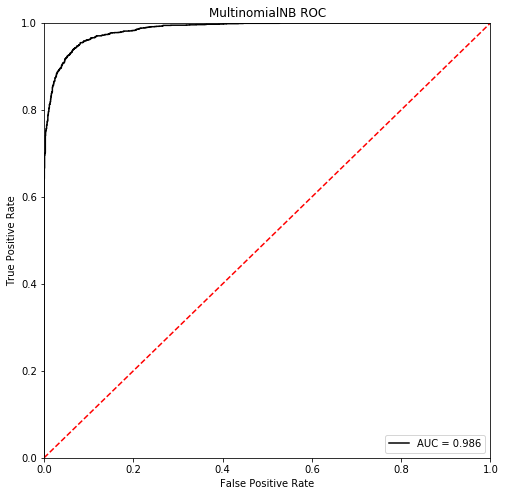

In [13]:
model.plot_roc(X_test, y_test, size_x=8, size_y=8)